Accuracy:  0.7223382045929019

Classification Report:
               precision    recall  f1-score   support

           A       0.33      0.10      0.15        21
           B       0.54      0.57      0.56        54
           C       0.53      0.65      0.58        78
           D       0.53      0.45      0.48        83
           F       0.90      0.93      0.91       243

    accuracy                           0.72       479
   macro avg       0.57      0.54      0.54       479
weighted avg       0.71      0.72      0.71       479

Predicted Grade: A ,for given student input


C:\Users\oosun\AppData\Local\Temp\ipykernel_16308\1421663965.py:37: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_input = df_input.apply(pd.to_numeric, errors='ignore')  # Cast numerics properly


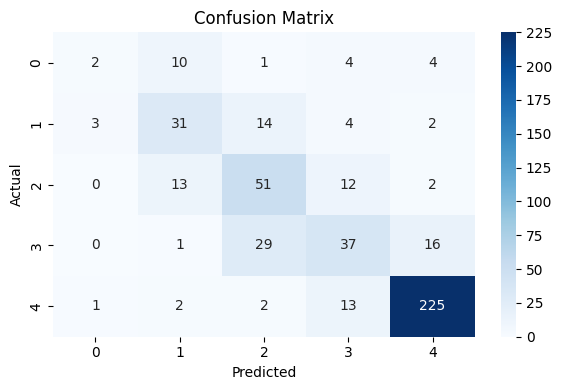

In [1]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Step 1: Loading the saved model and scaler from pkl files

with open("../artifacts/xgboost_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

#Step 2: Loading the test dataset
df_test = pd.read_csv('../data/test_data.csv', delimiter=",")

#Step 3: Preparing the test data
X_test = df_test.drop(columns=["StudentID", "GradeClass", "GPA"])
y_test = df_test['GradeClass']

#Step 4: Make Predictions
predictions = loaded_model.predict(X_test)

#Step 5: Prediction function
def predict_student_grade(input_string):
    columns = ["Age", "Gender", "Ethnicity", "ParentalEducation", "StudyTimeWeekly", "Absences", "Tutoring", "ParentalSupport", "Extracurricular","Sports", "Music", "Volunteering"]

    # Convert input string into a list
    input_data = input_string.split(",")

    # Automatically remove the first value (StudentID) and last two values (GPA & GradeClass)
    input_data = input_data[1:-2] # Removes 1 from start and last 2 items

    # Convert to DataFrame
    df_input = pd.DataFrame([input_data], columns=columns)

    # Create DataFrame from input
    df_input = pd.DataFrame([input_data], columns=columns)
    df_input = df_input.apply(pd.to_numeric, errors='ignore')  # Cast numerics properly

    # Predict using the loaded model
    prediction = loaded_model.predict(df_input)[0]
    
    #Mapping numeric class baack to the letter grade
    grade_map = {0: "A", 1: "B", 2: "C", 3: "D", 4: "F"}

    predicted_grade = grade_map[prediction] 

    return predicted_grade

#Step 6: Evaluate predictions
print("Accuracy: ", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=["A", "B", "C", "D", "F"]))

#Example testing input from the csv file
student_input = "1045,18,1,0,1,18.921512361376628,1,1,3,1,1,0,0,4.0,0.0"

#Print predicted grade
print(f"Predicted Grade: {predict_student_grade(student_input)} ,for given student input")

#Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()